# ADULT INCOME DATASET

## In this dataset we will be looking at trends between adult income and various social factors. 

In [21]:
##load libraries 
from numpy import nan
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency

### Load the adult income dataset

In [22]:
adult_income=pd.read_csv("adult.csv",sep=",")

In [23]:
adult_income.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


#### There are 14 columns and an independant income target variable

#### Convert the ? to Nan

In [24]:
adult_income = adult_income.replace('?',nan)
adult_income.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


#### Describe the different continuous categories summary statistics

In [25]:
adult_income.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


#### Look at the no of adults associated with each income bracket

In [26]:
adult_income.income.value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

#### Comparing the two different income thresholds across the different numerical variables


In [27]:

numeric_variables=adult_income.select_dtypes(include=['float64', 'int64']).columns
print(numeric_variables)

Index(['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')


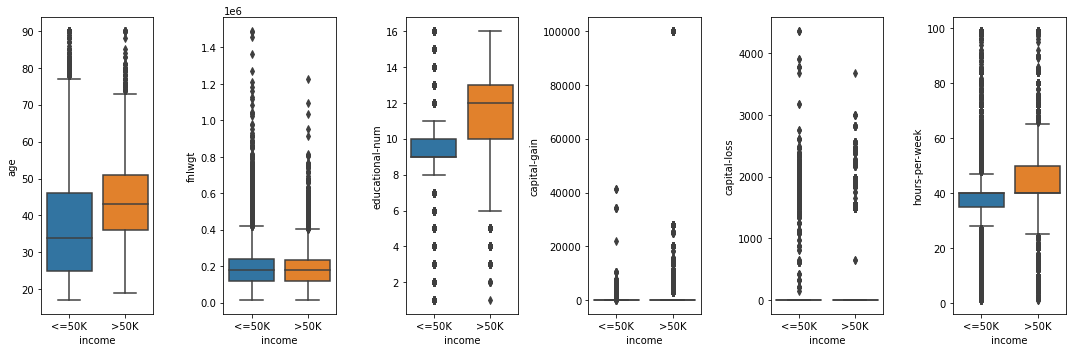

In [9]:
plt.figure(figsize=(15, 5))
for i, c in enumerate(numeric_variables):
    plt.subplot(1, len(numeric_variables), i + 1) 
    g = sns.boxplot(x="income", y=c,data=adult_income)
plt.tight_layout() 
plt.show()

#### There seems to be an association between income and age,educational_num, hours-worked per week, capital-loss and capital-gain.  Assuming normality of distribution we will use Anova test to check if these associations are significant.

In [10]:
for i, c in enumerate(numeric_variables):
    grouped=adult_income.groupby('income')[c].apply(list)
    f_val, p_val = f_oneway(*grouped)
    print(f"F-value:{c} {f_val}, p-value: {p_val}")

F-value:age 2737.207111901807, p-value: 0.0
F-value:fnlwgt 1.9625257410818864, p-value: 0.1612498059385631
F-value:educational-num 6075.369398043223, p-value: 0.0
F-value:capital-gain 2556.1790709041784, p-value: 0.0
F-value:capital-loss 1087.02756977735, p-value: 8.543599059076473e-236
F-value:hours-per-week 2670.3621236940835, p-value: 0.0


#### Income was significantly associated with age, educational-num, capital-gain, capital-loss and hours-per-week (worked)

#### Let us compare income with other categorical variables. Categorical variables to be compared with income shown 

In [14]:
categorical_variables=adult_income.drop("income",axis=1).select_dtypes(include=['object']).columns
print(categorical_variables)

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender', 'native-country'],
      dtype='object')


#### Let us do a chi-square test to compare significances between the categorical variables with income

In [29]:
for i, c in enumerate(categorical_variables):
    contingency_table = pd.crosstab(adult_income['income'], adult_income[c])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi2 Stat:{c} {chi2}, p-value: {p}")

Chi2 Stat:workclass 1238.9900392221089, p-value: 2.6121798441465798e-263
Chi2 Stat:education 6537.972961360964, p-value: 0.0
Chi2 Stat:marital-status 9816.015037266438, p-value: 0.0
Chi2 Stat:occupation 5502.144900139091, p-value: 0.0
Chi2 Stat:relationship 10088.72249015222, p-value: 0.0
Chi2 Stat:race 487.0262868376271, p-value: 4.2843777102233777e-104
Chi2 Stat:gender 2248.847679013691, p-value: 0.0
Chi2 Stat:native-country 451.17601430219054, p-value: 4.9465504983432925e-71


#### When we look at the association, there is a significant association of income with education, marital-status, workclass, occupation, relationship, race, gender and native-country.

#### Let us make barplots to look at this association

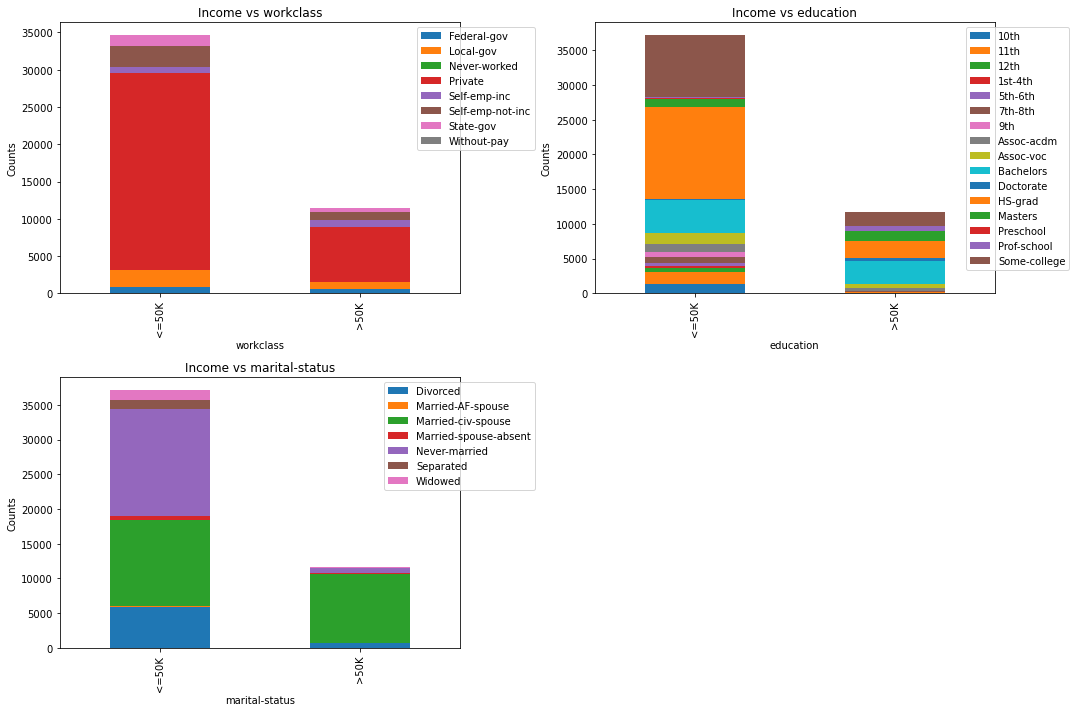

In [44]:
plt.figure(figsize=(15, 10))

for i, c in enumerate(categorical_variables[0:3]):
    plt.subplot(2,2, i + 1)  # Create a 2x2 grid of subplots
    pd.crosstab(adult_income['income'], adult_income[c]).plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title(f'Income vs {c}')
    plt.legend(bbox_to_anchor=(1.2, 1))
    plt.xlabel(c)
    plt.ylabel('Counts')

# Adjust layout
plt.tight_layout()
plt.show()

#### When we look at work class, it shows that those with lower income had a higher percentage of people working in local and state government. The lower income bracket also had a higher proportion of people who only had college and high school level education. Higher income had a majority of people who were married, whereas in the lower income bracket a significant chunk of people were never married  

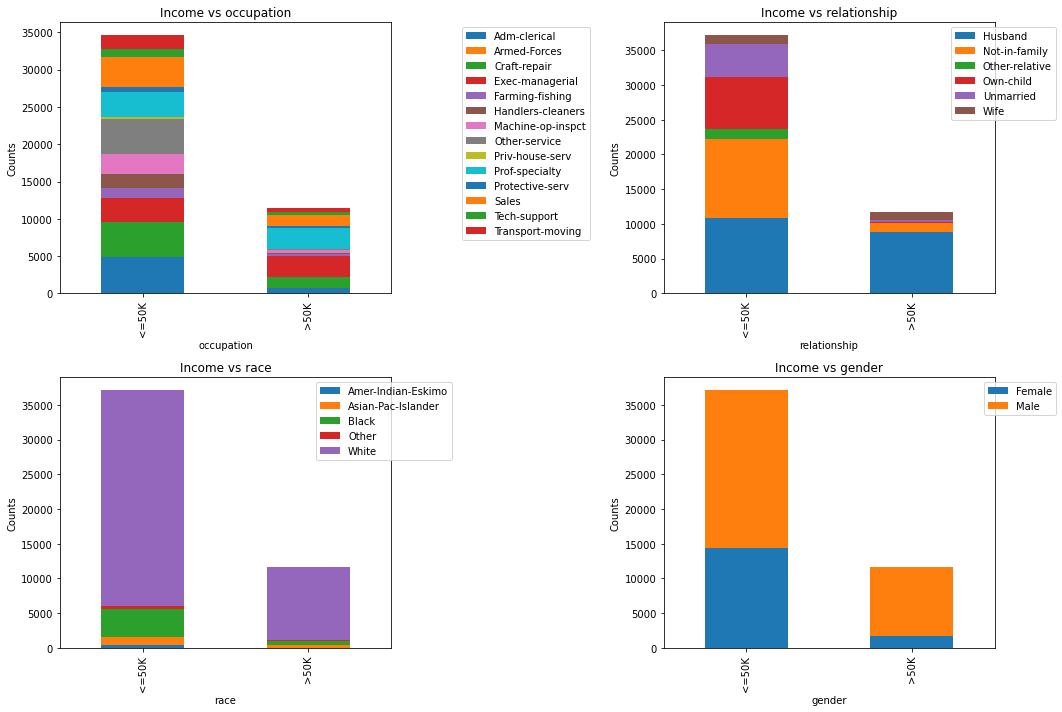

In [50]:
plt.figure(figsize=(15, 10))

for i, c in enumerate(categorical_variables[3:7]):
    plt.subplot(2,2, i + 1)  # Create a 2x2 grid of subplots
    pd.crosstab(adult_income['income'], adult_income[c]).plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title(f'Income vs {c}')
    plt.legend(bbox_to_anchor=(1.2, 1))
    plt.xlabel(c)
    plt.ylabel('Counts')

# Adjust layout
plt.tight_layout()
plt.show()

#### In lower income groups, there were significantly more people working in admin-clerical and armed forces positions. They were also more likely to be unmarried, not in a family and own a.child. There were signifcantly higher no of black people in the lower income grouo and a higher percentage of females.

Text(0, 0.5, 'Counts')

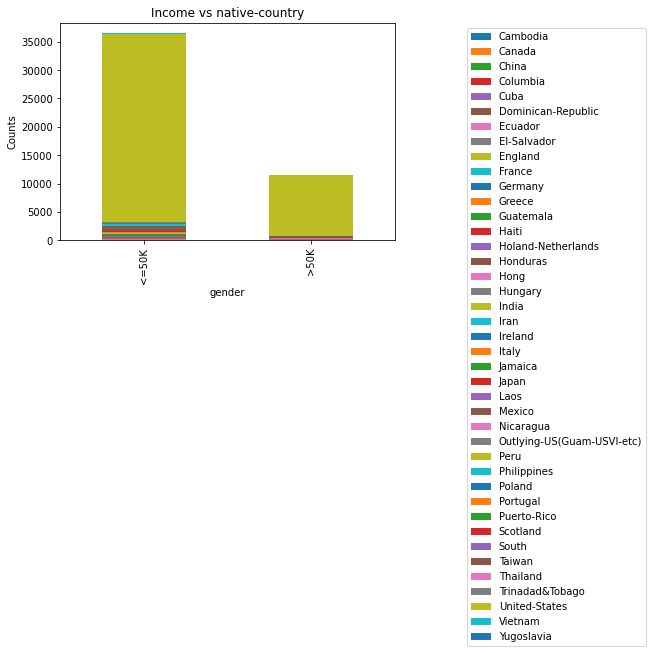

In [52]:
    pd.crosstab(adult_income['income'], adult_income["native-country"]).plot(kind='bar', stacked=True, ax=plt.gca())
    plt.title(f'Income vs native-country')
    plt.legend(bbox_to_anchor=(1.2, 1))
    plt.xlabel(c)
    plt.ylabel('Counts')


#### In the lower income group as in the higher income group,while the majority were citizens of the united states, the lower income group had people associated with a wide range of countries 

### We can see that there are such a wide range of factors with cotinuous variables such as age, number of years of education and hours worked per work as well as categorical variables such as occupation, race and genderhat can be associated with adult income and all these factors can easily be used to develop a predictive model to predict adult income.